In [1]:
from dotenv import load_dotenv
import os
from alpha_vantage.timeseries import TimeSeries

load_dotenv()
ts = TimeSeries(key=os.environ.get('AV_API_KEY'), output_format='pandas')

data, metadata = ts.get_daily_adjusted(symbol='AAPL',
                                           outputsize='full')
retsAAPL = data['5. adjusted close']

In [2]:
data, metadata = ts.get_daily_adjusted(symbol='A',
                                           outputsize='full')
retsA = data['5. adjusted close']

In [3]:
rets = retsA / retsAAPL
rets = rets.pct_change().dropna().sort_index()
rets

date
1999-11-19   -0.110269
1999-11-22    0.111533
1999-11-23   -0.106813
1999-11-24   -0.000130
1999-11-26   -0.000739
                ...   
2021-10-06   -0.002242
2021-10-07    0.001768
2021-10-08   -0.015670
2021-10-11   -0.015449
2021-10-12   -0.004738
Name: 5. adjusted close, Length: 5509, dtype: float64

In [4]:
import operator

import pyfolio as pf
import pandas as pd

from ljwtrader.strategy import ZScore
from ljwtrader.strategy import Position
from ljwtrader.system import TradingSystem
from ljwtrader.data import Backtest

if __name__ == '__main__':

    indicator1 = ZScore('AAPL', 'A', N_short=5, N_long=60, operator=operator.gt, value=1.0)
    indicator2 = ZScore('AAPL', 'A', N_short=5, N_long=60, operator=operator.lt, value=-1.0)
    back = Backtest()
    sys = TradingSystem()

    pos1 = Position('AAPL', indicator1, 'LONG')
    pos2 = Position('A', indicator1, 'SHORT')
    pos3 = Position('AAPL', indicator2, 'SHORT')
    pos4 = Position('A', indicator2, 'LONG')

    back.add_position_to_backtest(pos1, pos2, pos3, pos4)
    sys.add_position(pos1, pos2, pos3, pos4)
    sys.run_backtest(back)
    res = sys._portfolio.generate_historical_portfolio_df()
    res.index = pd.to_datetime(res.index)

/Users/leowotzak/PyProjects/LJWEquities/venv/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


                                    cash    commission  slippage        AAPL  \
2021-08-17 00:00:00.000000  89362.710476  10637.289524       0.0   471.98755   
2021-08-18 00:00:00.000000  89362.710476  10637.289524       0.0   471.98755   
2021-08-19 00:00:00.000000  89362.710476  10637.289524       0.0   471.98755   
2021-08-20 00:00:00.000000  89362.710476  10637.289524       0.0   471.98755   
2021-08-23 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   
2021-08-24 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   
2021-08-25 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   
2021-08-26 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   
2021-08-27 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   
2021-08-30 00:00:00.000000  89360.606339  10639.393661       0.0 -8360.90245   

                                     A  
2021-08-17 00:00:00.000000  -471.98755  
2021-08-18 00:00:00.000000  -471.9875

Start date,1999-11-02
End date,2021-08-30
Total months,261
,Backtest
Annual return,-0.5%
Cumulative returns,-10.6%
Annual volatility,0.3%
Sharpe ratio,-1.88
Calmar ratio,-0.05
Stability,0.72
Max drawdown,-10.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,10.64,2000-02-18,2021-08-23,NaT,NaN
1,0.00,1999-11-02,1999-11-02,1999-11-02,1
2,0.00,1999-11-02,1999-11-02,1999-11-02,1
3,0.00,1999-11-02,1999-11-02,1999-11-02,1
4,0.00,1999-11-02,1999-11-02,1999-11-02,1


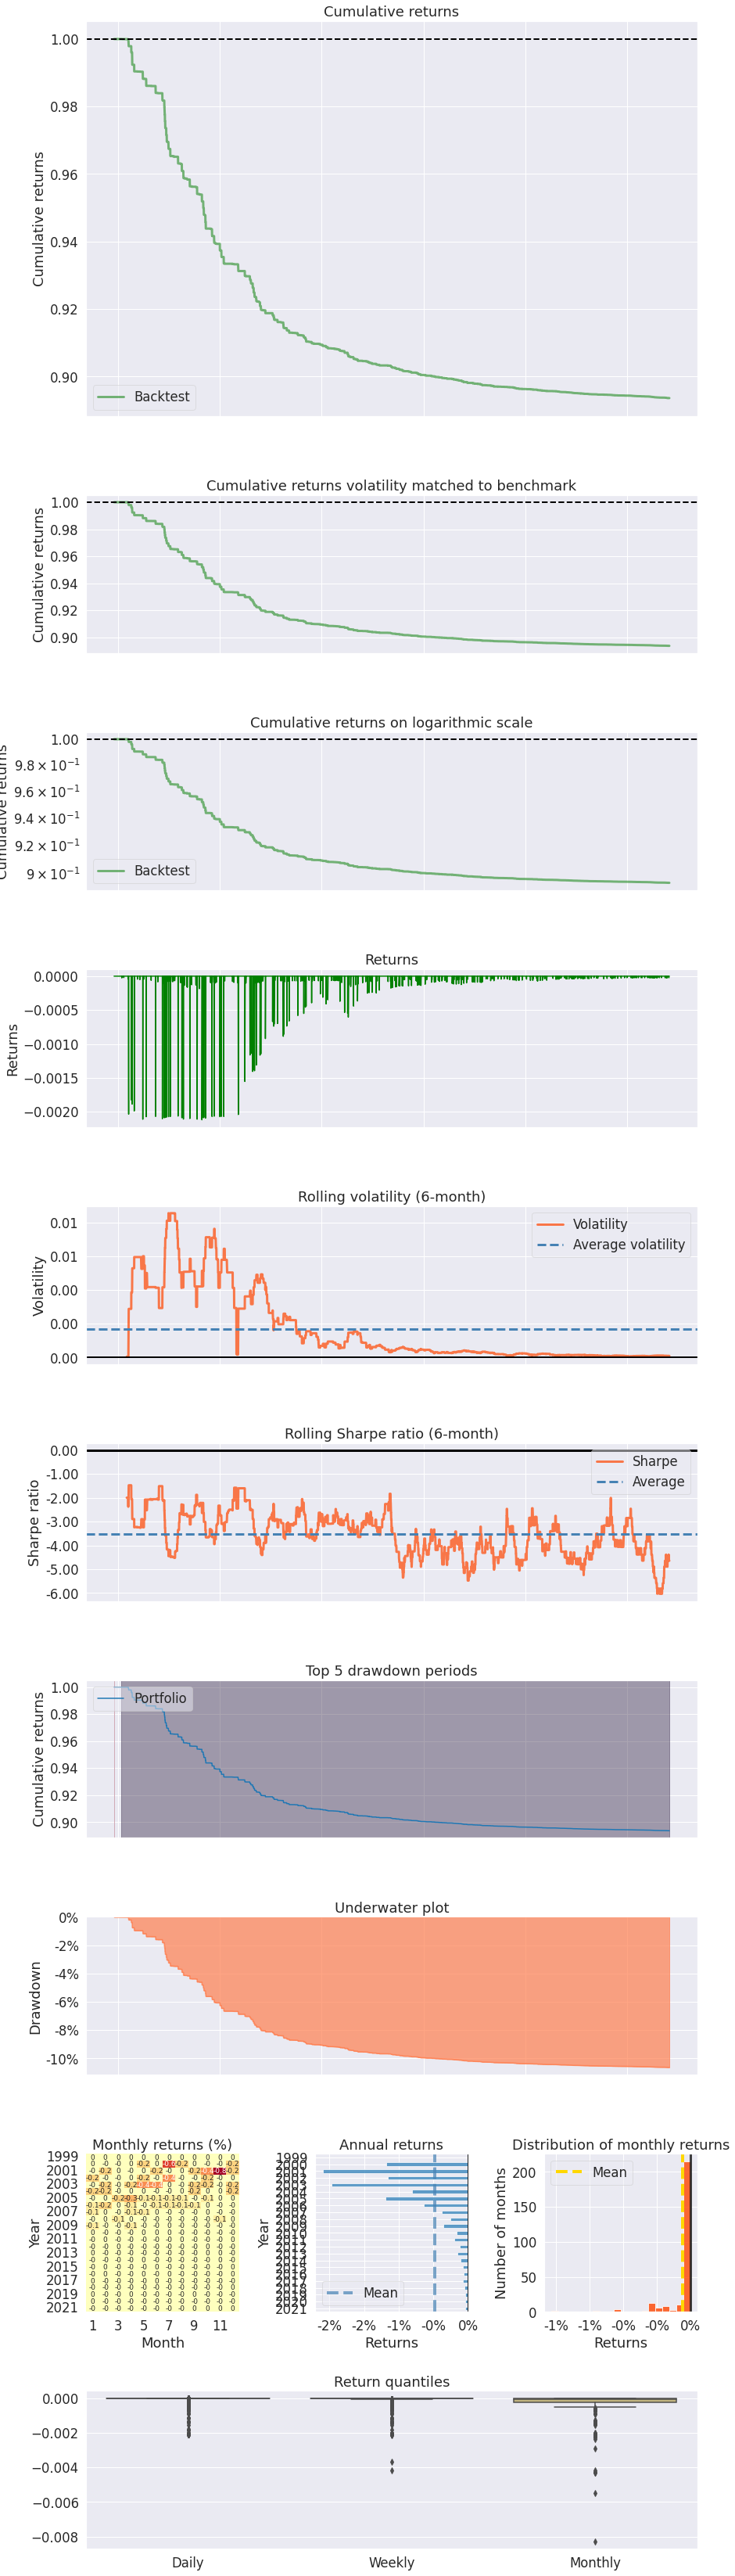

In [6]:
    pf.create_returns_tear_sheet(res['cash'].pct_change().dropna())